# Telecom Churn Case Study

In [1]:
# Importing libraries
import pandas as pd
pd.options.display.max_columns = 300
pd.options.display.max_rows = 999
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading dataset
telecom = pd.read_csv('telecom_churn_data.csv')

In [3]:
# Reviewing first 2 rows
telecom.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [4]:
# Reviewing if data is properly read
telecom.shape

(99999, 226)

In [5]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.

In [6]:
# Reviewing feature types
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

# Data Preparation and Filtering

### Missing Values Treatment

In [7]:
values = pd.DataFrame(telecom.isnull().sum()).reset_index()
values = values.rename(columns={0:'null'})
values[values['null'] > 0]

,index,null
2,loc_og_t2o_mou,1018
3,std_og_t2o_mou,1018
4,loc_ic_t2o_mou,1018
6,last_date_of_month_7,601
7,last_date_of_month_8,1100
8,last_date_of_month_9,1659
13,onnet_mou_6,3937
14,onnet_mou_7,3859
15,onnet_mou_8,5378
16,onnet_mou_9,7745


## Perform Imputation 

### Impute with 0

In [8]:
zero_imputation=['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8']
for i in zero_imputation:
    telecom[i].fillna(0, inplace=True)

### Separate Good Phase Data

In [9]:
telecom['good_phase_cust'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'] +((telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']) +
                                         (telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7'])))

### Filtering High Value Customers considering 70 Percentile of Good Phase Data

In [10]:
telecom_1 = telecom[telecom['good_phase_cust'] > telecom['good_phase_cust'].quantile(0.7)]

In [11]:
telecom_1.loc[:,'churn'] = 0

telecom_1.loc[(telecom_1['total_ic_mou_9'] == 0) &
    (telecom_1['total_og_mou_9'] == 0) &
    (telecom_1['vol_2g_mb_9'] == 0) &
    (telecom_1['vol_3g_mb_9'] == 0), ['churn']] = 1

telecom_1['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [12]:
# Confirming the counts of high value customer match the counts given by Upgrad
telecom_1.shape

(29953, 228)

### Tagging Churners and dropping the data for September

In [13]:
nine_month_var=['last_date_of_month_9', 'sep_vbc_3g','arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']

In [14]:
# Confirming the counts after dropping the Sep data
telecom_1 = telecom_1.drop(nine_month_var, axis=1)
telecom_1.shape

(29953, 173)

### Reviewing missing values in filtered dataset

In [15]:
values = pd.DataFrame(telecom_1.isnull().sum()).reset_index()
values = values.rename(columns={0:'null'})
values[values['null'] > 0]

,index,null
2,loc_og_t2o_mou,223
3,std_og_t2o_mou,223
4,loc_ic_t2o_mou,223
6,last_date_of_month_7,27
7,last_date_of_month_8,165
11,onnet_mou_6,542
12,onnet_mou_7,536
13,onnet_mou_8,1172
14,offnet_mou_6,542
15,offnet_mou_7,536


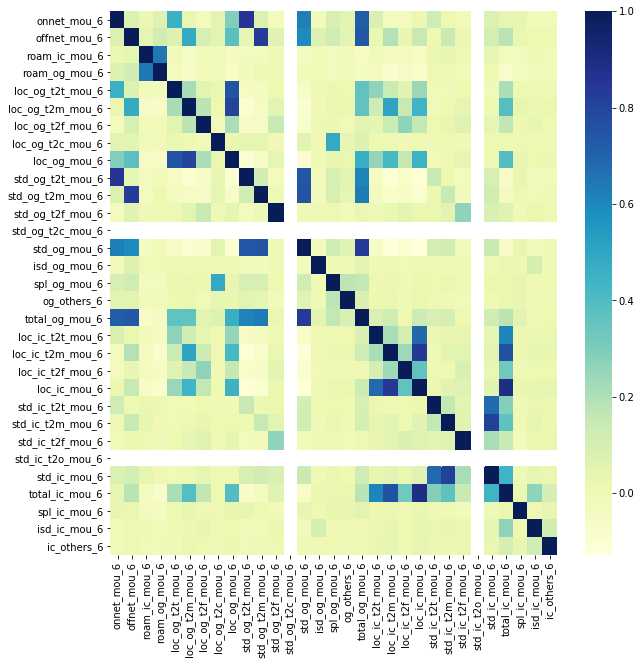

In [16]:
# Checking corelation in numerical variables
plt.figure(figsize=(10,10))
sns.heatmap(telecom_1[['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].corr(),cmap="YlGnBu")
plt.show()

## Analysis of Data for June

Incoming Calls

In [17]:
# Local Incoming Calls
temp = pd.DataFrame(telecom_1['loc_ic_mou_6'] -
                    (telecom_1['loc_ic_t2t_mou_6'] + telecom_1['loc_ic_t2m_mou_6'] +telecom_1['loc_ic_t2f_mou_6'])
                   )
print("Local incoming calls for June")
print(temp.describe())

# Std Incoming calls
temp = pd.DataFrame(telecom_1['std_ic_mou_6'] -
             (telecom_1['std_ic_t2t_mou_6'] + telecom_1['std_ic_t2m_mou_6'] + telecom_1['std_ic_t2f_mou_6']+telecom_1['std_ic_t2o_mou_6'])
            )
print("Std incoming calls for June")
print(temp.describe())

# Total incoming calls
temp = pd.DataFrame(telecom_1['total_ic_mou_6'] -
             (telecom_1['loc_ic_mou_6']+ telecom_1['std_ic_mou_6']+ telecom_1['isd_ic_mou_6']+
              telecom_1['spl_ic_mou_6']+ telecom_1['ic_others_6'])
            )
print("Total incoming calls for June")
print(temp.describe())

Local incoming calls for June
             0
count 29411.00
mean      0.01
std       0.01
min      -0.00
25%       0.01
50%       0.01
75%       0.01
max       0.02
Std incoming calls for June
             0
count 29411.00
mean      0.00
std       0.01
min      -0.00
25%       0.00
50%       0.00
75%       0.01
max       0.02
Total incoming calls for June
             0
count 29411.00
mean      0.01
std       0.01
min      -0.00
25%       0.00
50%       0.01
75%       0.01
max       0.04


Outgoing Calls

In [18]:
# Local outgoing calls 
temp = pd.DataFrame(telecom_1['loc_og_mou_6'] -
                    (telecom_1['loc_og_t2t_mou_6'] + telecom_1['loc_og_t2m_mou_6'] +telecom_1['loc_og_t2f_mou_6'])
                   )
print("Local outgoing calls for June")
print(temp.describe())

# Analyzing all the std outgoing calls for month 6
temp = pd.DataFrame(telecom_1['std_og_mou_6'] -
             (telecom_1['std_og_t2t_mou_6'] + telecom_1['std_og_t2m_mou_6'] + telecom_1['std_og_t2f_mou_6'])
            )
print("Std outgoing calls for June")
print(temp.describe())

# Analyzing total outgoing calls for month 6
temp = pd.DataFrame(telecom_1['total_og_mou_6'] -
             (telecom_1['loc_og_mou_6']+ telecom_1['std_og_mou_6']+ telecom_1['isd_og_mou_6']+
              telecom_1['spl_og_mou_6']+ telecom_1['og_others_6'])
            )
            
print("Total outgoing calls for June")
print(temp.describe())

Local outgoing calls for June
             0
count 29411.00
mean      0.01
std       0.01
min      -0.00
25%       0.00
50%       0.01
75%       0.01
max       0.02
Std outgoing calls for June
             0
count 29411.00
mean      0.00
std       0.01
min      -0.00
25%       0.00
50%       0.00
75%       0.01
max       0.02
Total outgoing calls for June
             0
count 29411.00
mean      0.01
std       0.01
min      -0.00
25%       0.00
50%       0.01
75%       0.01
max       0.04


In the above analysis we observe that Total variable is the sum of the other variables. Hence if missing values are replaced by 0 then results will be same

### Impute missing values with 0 for Jun, Jul, Aug in filtered dataset as per above analysis

In [19]:
var_4 = ['loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
                               'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou', 'std_ic_mou', 'total_ic_mou',
                               'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'loc_og_t2t_mou', 'loc_og_t2m_mou',
                               'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou',
                               'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou',
                               'og_others', 'total_og_mou',]

for i in var_4:
    for j in ['6', '7', '8']:
        temp = i + '_' + j
        telecom_1[temp].fillna(0, inplace=True)

## Treating Categorical Variables

In [20]:
cat_var_1=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

for i in cat_var_1:
    print(telecom_1[i].value_counts())

0.00    16333
1.00      407
Name: night_pck_user_6, dtype: int64
0.00    16663
1.00      375
Name: night_pck_user_7, dtype: int64
0.00    15594
1.00      341
Name: night_pck_user_8, dtype: int64
1.00    15511
0.00     1229
Name: fb_user_6, dtype: int64
1.00    15705
0.00     1333
Name: fb_user_7, dtype: int64
1.00    14297
0.00     1638
Name: fb_user_8, dtype: int64


The above analysis show that there are missing values which need to be treated. We will replace them with some dummy number "1.5" since "0" is valid.

In [21]:
#Replacing with 1.5
for i in cat_var_1:
        telecom_1[i].fillna(1.5, inplace=True)

Since we have to use PCA, we need to handle categorical variables. One way to handle is via one hot encoding however since we are not sure about the imputation values we will replacing individual value with its proportion.

### 1. Imputation by Proportions

In [22]:
for i in cat_var_1:
        unique_values = list(telecom_1[i].unique())
        telecom_1.loc[:,i + '_churn'] = 0
        for value in unique_values:
            mean_value = telecom_1.loc[telecom_1[i] == value, :].groupby(i)['churn'].mean().get_value(value)
            mean_value = float("{0:.2f}".format(mean_value))
            telecom_1.loc[telecom_1[i] == value, [i + '_churn']] = mean_value
            print((i, value), mean_value)

('night_pck_user_6', 0.0) 0.07
('night_pck_user_6', 1.5) 0.1
('night_pck_user_6', 1.0) 0.09
('night_pck_user_7', 0.0) 0.06
('night_pck_user_7', 1.5) 0.11
('night_pck_user_7', 1.0) 0.06
('night_pck_user_8', 0.0) 0.03
('night_pck_user_8', 1.5) 0.14
('night_pck_user_8', 1.0) 0.03
('fb_user_6', 1.0) 0.07
('fb_user_6', 1.5) 0.1
('fb_user_6', 0.0) 0.08
('fb_user_7', 1.0) 0.06
('fb_user_7', 1.5) 0.11
('fb_user_7', 0.0) 0.07
('fb_user_8', 1.0) 0.02
('fb_user_8', 1.5) 0.14
('fb_user_8', 0.0) 0.07


In [23]:
# Dropping the required variables
telecom_1 = telecom_1.drop(cat_var_1, axis=1)

In [24]:
# Verifying the dataset post dropping
telecom_1.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,good_phase_cust,churn,night_pck_user_6_churn,night_pck_user_7_churn,night_pck_user_8_churn,fb_user_6_churn,fb_user_7_churn,fb_user_8_churn
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,197.38,214.82,213.80,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.00,1.00,1.00,252.00,252.00,252.00,0.00,0.00,0.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1118.00,1,0.07,0.06,0.03,0.07,0.06,0.02
7,7000701601,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,9

In [25]:
# Verifying the dataset count post dropping
telecom_1.shape

(29953, 173)

### 2. Dropping columns with Zero Variance

In [26]:
# Zero variance data
var_2= ['loc_og_t2o_mou','std_og_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
                    'std_og_t2c_mou_8', 'loc_ic_t2o_mou', 'std_ic_t2o_mou_6',
                     'std_ic_t2o_mou_7', 'circle_id']

for i in var_2:
    print(telecom_1[i].value_counts())


0.00    29730
Name: loc_og_t2o_mou, dtype: int64
0.00    29730
Name: std_og_t2o_mou, dtype: int64
0.00    29953
Name: std_og_t2c_mou_6, dtype: int64
0.00    29953
Name: std_og_t2c_mou_7, dtype: int64
0.00    29953
Name: std_og_t2c_mou_8, dtype: int64
0.00    29730
Name: loc_ic_t2o_mou, dtype: int64
0.00    29953
Name: std_ic_t2o_mou_6, dtype: int64
0.00    29953
Name: std_ic_t2o_mou_7, dtype: int64
109    29953
Name: circle_id, dtype: int64


In [27]:
telecom_1 = telecom_1.drop(var_2, axis=1)

### Verifying Missing Values in remaining Dataset

In [28]:
values = pd.DataFrame(telecom_1.isnull().sum()).reset_index()
values = values.rename(columns={0:'null'})
values[values['null'] > 0]

,index,null
2,last_date_of_month_7,27
3,last_date_of_month_8,165
7,onnet_mou_6,542
8,onnet_mou_7,536
9,onnet_mou_8,1172
10,offnet_mou_6,542
11,offnet_mou_7,536
12,offnet_mou_8,1172
13,roam_ic_mou_6,542
14,roam_ic_mou_7,536


On the basis of above analysis, we will drop all columns with more than 10000 missing values. Rest of the data, we will impute with 0

### 3. Dropping variables with more than 10000 missing values

In [29]:
var_5 =['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 
        'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']

In [30]:
telecom_1 = telecom_1.drop(var_5, axis=1)

In [31]:
# Verifying the dataset count post dropping
telecom_1.shape

(29953, 152)

### 4. Replacing rest of the columns with 0 as per above analysis

In [32]:
var_3 = ['onnet_mou_6','onnet_mou_7','onnet_mou_8',
         'offnet_mou_6','offnet_mou_7','offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8',
         'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']

for i in var_3:
    telecom_1[i].fillna(0, inplace=True)

### 5. Treating Date variables by replacing missing dates with 15th of the month for analysis

In [33]:
telecom_1['last_date_of_month_6'].fillna('6/15/2014', inplace=True)
telecom_1['last_date_of_month_6'] = pd.to_datetime(telecom_1['last_date_of_month_6'],format='%m/%d/%Y')
telecom_1['last_date_of_month_7'].fillna('7/15/2014', inplace=True)
telecom_1['last_date_of_month_7'] = pd.to_datetime(telecom_1['last_date_of_month_7'],format='%m/%d/%Y')
telecom_1['last_date_of_month_8'].fillna('8/15/2014', inplace=True)
telecom_1['last_date_of_month_8'] = pd.to_datetime(telecom_1['last_date_of_month_8'],format='%m/%d/%Y')

In [34]:
values = pd.DataFrame(telecom.isnull().sum()).reset_index()
values = values.rename(columns={0:'null'})
values[values['null'] > 0]

,index,null
2,loc_og_t2o_mou,1018
3,std_og_t2o_mou,1018
4,loc_ic_t2o_mou,1018
6,last_date_of_month_7,601
7,last_date_of_month_8,1100
8,last_date_of_month_9,1659
13,onnet_mou_6,3937
14,onnet_mou_7,3859
15,onnet_mou_8,5378
16,onnet_mou_9,7745


## Creating Derived variables

#### 1 - Duration of recharge

In [35]:
fields = ['date_of_last_rech', 'date_of_last_rech_data']
months = ['6','7','8']
dummy_date = '01/15/2010'

for i in fields:
    for j in months:
        temp = i + '_' + j
        telecom_1[temp].fillna(dummy_date, inplace=True)
        
        # Assigning all the missing values to high date which will give a high age
        telecom_1[temp] = pd.to_datetime(telecom_1[temp],format='%m/%d/%Y')
        telecom_1['duration_' + temp] = (telecom_1['last_date_of_month_8'] - telecom_1[temp]).dt.days
        
telecom_1['duration_recharge'] = telecom_1.loc[:, ['duration_date_of_last_rech_6',
                                    'duration_date_of_last_rech_7','duration_date_of_last_rech_8']].min(axis=1)
telecom_1['duration_recharge_data'] = telecom_1.loc[:, ['duration_date_of_last_rech_data_6',
                                    'duration_date_of_last_rech_data_7','duration_date_of_last_rech_data_8']].min(axis=1)
telecom_1['duration_recharge_and_data'] = telecom_1.loc[:, ['duration_recharge', 'duration_recharge_data']].min(axis=1)

#### 2 - Difference between last Good month Jul and Action month Aug

In [36]:
telecom_1['offnet_mou_7_8'] = telecom_1.offnet_mou_8 - telecom_1.offnet_mou_7

telecom_1['roam_ic_mou_7_8'] = telecom_1.roam_ic_mou_8 -  telecom_1.roam_ic_mou_7

telecom_1['arpu_7_8'] = telecom_1.arpu_8 - telecom_1.arpu_7

telecom_1['onnet_mou_7_8'] = telecom_1.onnet_mou_8 - telecom_1.onnet_mou_7

telecom_1['roam_og_mou_7_8'] = telecom_1.roam_og_mou_8 - telecom_1.roam_og_mou_7

telecom_1['loc_og_mou_7_8'] = telecom_1.loc_og_mou_8 - telecom_1.loc_og_mou_7

telecom_1['total_og_mou_7_8'] = telecom_1.total_og_mou_8 - telecom_1.total_og_mou_7

telecom_1['loc_ic_mou_7_8'] = telecom_1.loc_ic_mou_8 - telecom_1.loc_ic_mou_7

telecom_1['std_ic_mou_7_8'] = telecom_1.std_ic_mou_8 - telecom_1.std_ic_mou_7

telecom_1['isd_ic_mou_7_8'] = telecom_1.isd_ic_mou_8 - telecom_1.isd_ic_mou_7

telecom_1['std_og_mou_7_8'] = telecom_1.std_og_mou_8 - telecom_1.std_og_mou_7

telecom_1['isd_og_mou_7_8'] = telecom_1.isd_og_mou_8 - telecom_1.isd_og_mou_7

telecom_1['spl_og_mou_7_8'] = telecom_1.spl_og_mou_8 - telecom_1.spl_og_mou_7

telecom_1['spl_ic_mou_7_8'] = telecom_1.spl_ic_mou_8 - telecom_1.spl_ic_mou_7

telecom_1['total_ic_mou_7_8'] = telecom_1.total_ic_mou_8 - telecom_1.total_ic_mou_7

telecom_1['total_rech_num_7_8'] = telecom_1.total_rech_num_8 - telecom_1.total_rech_num_7

telecom_1['max_rech_data_7_8'] = telecom_1.max_rech_data_8 - telecom_1.max_rech_data_7

telecom_1['av_rech_amt_data_7_8'] = telecom_1.av_rech_amt_data_8 - telecom_1.av_rech_amt_data_7

telecom_1['vol_2g_mb_7_8'] = telecom_1.vol_2g_mb_8 - telecom_1.vol_2g_mb_7

telecom_1['vol_3g_mb_7_8'] = telecom_1.vol_3g_mb_8 - telecom_1.vol_3g_mb_7

telecom_1['total_rech_amt_7_8'] = telecom_1.total_rech_amt_8 - telecom_1.total_rech_amt_7

telecom_1['max_rech_amt_7_8'] = telecom_1.max_rech_amt_8 - telecom_1.max_rech_amt_7

telecom_1['total_rech_data_7_8'] = telecom_1.total_rech_data_8 - telecom_1.total_rech_data_7

### Checking Outliers

In [37]:
def outliers(df, column, n):
    q_3, q_1 = np.percentile(df[column], [75 ,25])
    iqr = q_3 - q_1
    min_v = q_1 - (iqr * 1.5)
    max_v = q_3 + (iqr * 1.5)
    df.loc[df[column] < min_v,column] = df[column].median()
    df.loc[df[column] > max_v,column] = df[column].median()
    df[column+'_bin'] = pd.cut((df[column]),n)
    return df

In [38]:
# Checking the distribution of og_others_8
telecom_temp = outliers(telecom_1.copy(),'og_others_8',4)
telecom_temp.groupby('og_others_8_bin')['mobile_number'].count()

og_others_8_bin
(-0.001, -0.0005]        0
(-0.0005, 0.0]       29953
(0.0, 0.0005]            0
(0.0005, 0.001]          0
Name: mobile_number, dtype: int64

In [39]:
# Dropping outliers
telecom_1 = telecom_1.drop('og_others_8',axis=1)

## Exploratory Data Analysis

In [40]:
def graph(df, column, name):
    table = pd.DataFrame(df.groupby(column)['churn'].agg(['count','mean']))
    customers_num = table['count'].sum()
    table['fraction'] = (table['count']/customers_num) * 100
    ax = table[['fraction']].plot(kind='bar', legend=False)
    ax2 = ax.twinx()
    ax2.plot(table[['mean']].values, linestyle='-', marker='o', linewidth=1.0, color='blue')
    ax.set_xlabel(name,fontweight='bold', fontsize=20)
    ax.set_ylabel('Percentage',color="red",fontweight='bold', fontsize=20)
    ax2.set_ylabel('Churn',color="red",fontweight='bold', fontsize=20)
    plt.show()

#### Average Recharge Amount Data (Mobile Internet) for Jun

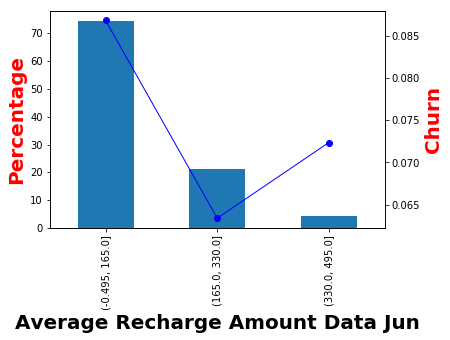

In [41]:
temp = outliers(telecom_1.copy(),'av_rech_amt_data_6',3)
graph(temp, temp.av_rech_amt_data_6_bin, "Average Recharge Amount Data Jun")

#### Average Recharge Amount Data (Mobile Internet) for Jul

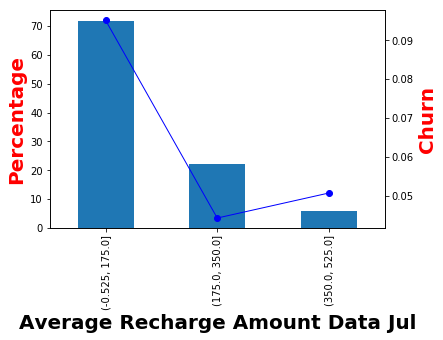

In [42]:
temp = outliers(telecom_1.copy(),'av_rech_amt_data_7',3)
graph(temp, temp.av_rech_amt_data_7_bin, "Average Recharge Amount Data Jul")

#### Average Recharge Amount Data (Mobile Internet) for Aug

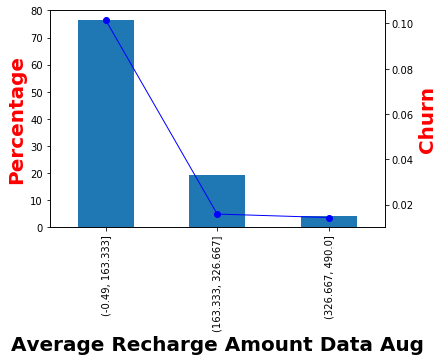

In [43]:
temp = outliers(telecom_1.copy(),'av_rech_amt_data_8',3)
graph(temp, temp.av_rech_amt_data_8_bin, "Average Recharge Amount Data Aug")

Inference - As per the above 3 graphs for Average Recharge Amount for Data (Mobile Internet), we find that the people who fall in the low recharge category are the people who churn significantly. This could be possible that there are lesser recharge plan options for this price range. Possible other service providers have better data offers which may lead to this trend. Whereas the trend for reduction in churn for customers with higher average recharge amount may be attributed to some change in plans or service. 

#### Total Recharge Amount for Jun

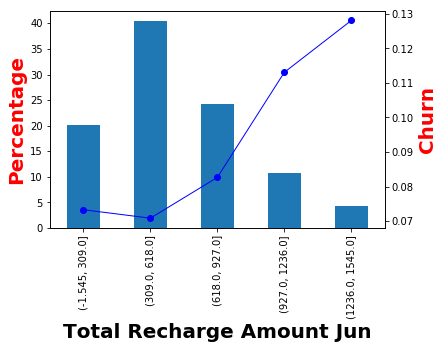

In [44]:
temp = outliers(telecom_1.copy(),'total_rech_amt_6',5)
graph(temp, temp.total_rech_amt_6_bin, "Total Recharge Amount Jun")

#### Total Recharge Amount for Jul

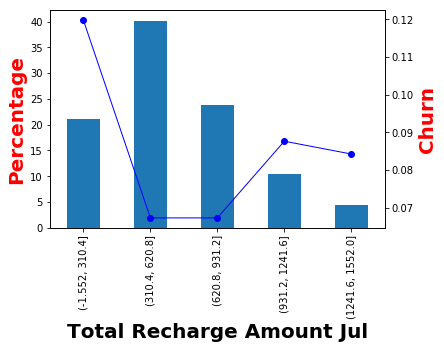

In [45]:
temp = outliers(telecom_1.copy(),'total_rech_amt_7',5)
graph(temp, temp.total_rech_amt_7_bin, "Total Recharge Amount Jul")

#### Total Recharge Amount for Aug

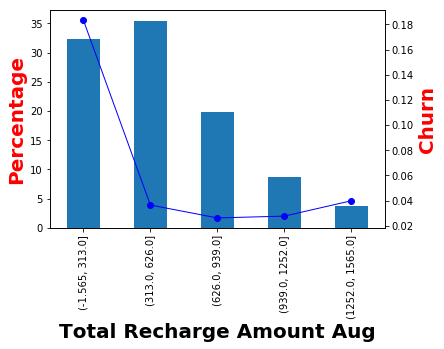

In [46]:
temp = outliers(telecom_1.copy(),'total_rech_amt_8',5)
graph(temp, temp.total_rech_amt_8_bin, "Total Recharge Amount Aug")

Inference - As per the above 3 graphs for Total Recharge Amount, we observe that customers who do high value recharge in June show highest churn rate in June, however in the subsequent months, the churn is lesser for this category. Whereas the customers who fall in low recharge category show an increase in trend for churning rate in the months post June. Possible this may be due to same change in Plan or service provided.

#### Average Revenue per User for Jun

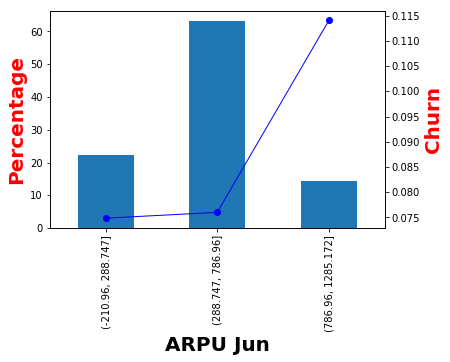

In [47]:
temp = outliers(telecom_1.copy(),'arpu_6',3)
graph(temp, temp.arpu_6_bin, "ARPU Jun")

#### Average Revenue per User for Jul

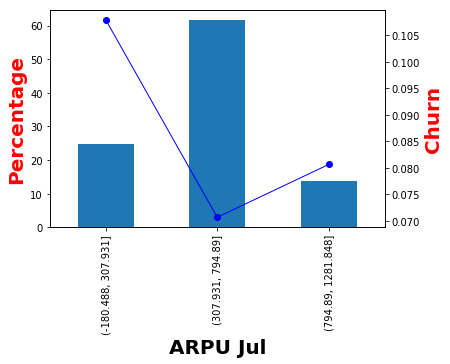

In [48]:
temp = outliers(telecom_1.copy(),'arpu_7',3)
graph(temp, temp.arpu_7_bin, "ARPU Jul")

#### Average Revenue per User for Aug

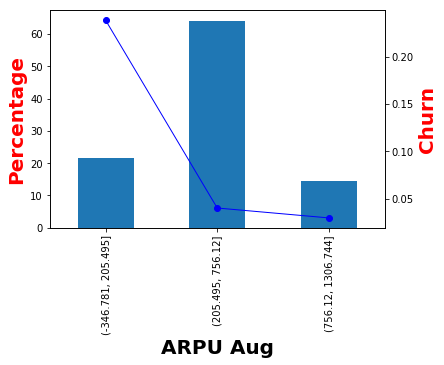

In [49]:
temp = outliers(telecom_1.copy(),'arpu_8',3)
graph(temp, temp.arpu_8_bin, "ARPU Aug")

Inference - As per the above 3 graphs for Average Revenue for User, we observe that customers who generate high revenue in June show highest churn rate in June, however in the subsequent months, the churn is lesser for this category. Whereas the customers who fall in low revenue category show an increase in trend for churning rate in the months post June. Possible this may be due to same change in Plan or service provided. 

#### Total Recharge Data (Mobile Internet) for Jun 

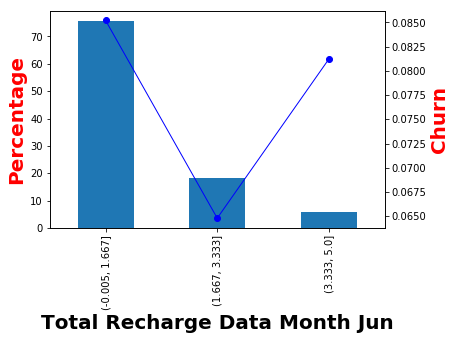

In [50]:
temp = outliers(telecom_1.copy(),'total_rech_data_6',3)
graph(temp, temp.total_rech_data_6_bin, "Total Recharge Data Month Jun")

#### Total Recharge Data (Mobile Internet) for Jul

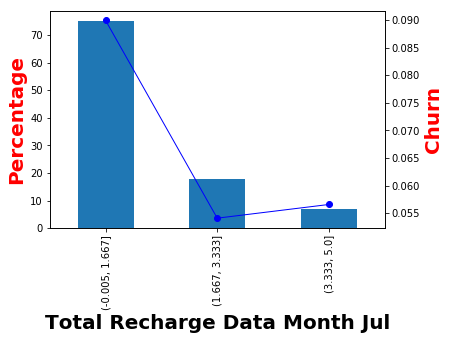

In [51]:
temp = outliers(telecom_1.copy(),'total_rech_data_7',3)
graph(temp, temp.total_rech_data_7_bin, "Total Recharge Data Month Jul")

#### Total Recharge Data (Mobile Internet) for Aug

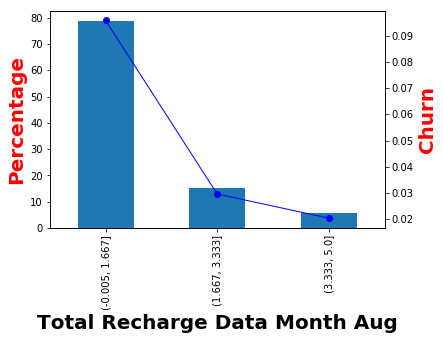

In [52]:
temp = outliers(telecom_1.copy(),'total_rech_data_8',3)
graph(temp, temp.total_rech_data_8_bin, "Total Recharge Data Month Aug")

Inference - As per the above 3 graphs for Total Recharge for Data, we find that the people who fall in the low recharge category are the people who churn significantly. Whereas the trend for reduction in churn for customers with higher Total Recharge data may be attributed to some change in plans or service.

#### Duration of Recharge

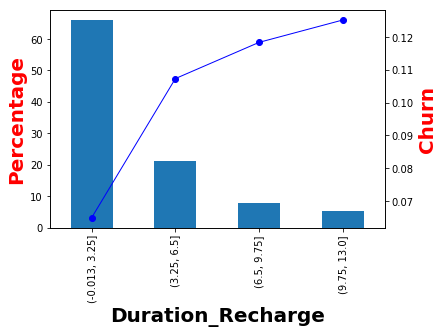

In [53]:
temp = outliers(telecom_1.copy(),'duration_recharge',4)
graph(temp, temp.duration_recharge_bin, "Duration_Recharge")

Inference - We observe, that as the duration of the recharge increases, the rate of customer churn also becomes higher. 

## Separating Dependent and Independent Variables for Modelling

In [54]:
from sklearn.model_selection import train_test_split
var_6 = ['churn','mobile_number','date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
               'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
               'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
# Putting feature variable to X
X = telecom_1.drop(var_6,axis=1)

# Putting response variable to y
y = telecom_1['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

## Checking for Class Imbalance

In [55]:
#checking if dataset is balanced
churn = (sum(y)/len(y.index))*100
churn

8.122725603445398

## Treating Class Imbalance

Since there exist high Class Imbalance, we do Under Sampling to treat this difference

In [56]:
from imblearn.under_sampling import RandomUnderSampler

# Apply the random under-sampling
ind = RandomUnderSampler(return_indices=True)
X_res, y_res, idx = ind.fit_sample(X, y)

In [57]:
y_res=pd.DataFrame(y_res)

# Renaming the column '0' as 'churn'
y_res= y_res.rename(columns={ 0 : 'churn'})
X_res=pd.DataFrame(X_res,columns=X.columns)

In [58]:
churn = (sum(y_res.churn)/len(y_res.churn))*100
churn 

50.0

#### After undersampling, the churn rate is 50% . 

In [59]:
## Normalizing the features
from sklearn import preprocessing
norm_X_data = preprocessing.normalize(X_res)

In [60]:
norm_X_data =pd.DataFrame(norm_X_data,columns=X.columns)
norm_X_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,good_phase_cust,night_pck_user_6_churn,night_pck_user_7_churn,night_pck_user_8_churn,fb_user_6_churn,fb_user_7_churn,fb_user_8_churn,duration_date_of_last_rech_6,duration_date_of_last_rech_7,duration_date_of_last_rech_8,duration_date_of_last_rech_data_6,duration_date_of_last_rech_data_7,duration_date_of_last_rech_data_8,duration_recharge,duration_recharge_data,duration_recharge_and_data,offnet_mou_7_8,roam_ic_mou_7_8,arpu_7_8,onnet_mou_7_8,roam_og_mou_7_8,loc_og_mou_7_8,total_og_mou_7_8,loc_ic_mou_7_8,std_ic_mou_7_8,isd_ic_mou_7_8,std_og_mou_7_8,isd_og_mou_7_8,spl_og_mou_7_8,spl_ic_mou_7_8,total_ic_mou_7_8,total_rech_num_7_8,max_rech_data_7_8,av_rech_amt_data_7_8,vol_2g_mb_7_8,vol_3g_mb_7_8,total_rech_amt_7_8,max_rech_amt_7_8,total_rech_data_7_8
0,0.05,0.11,0.13,0.10,0.16,0.19,0.03,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.02,0.03,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.04,0.04,0.09,0.16,0.18,0.01,0.01,0.02,0.00,0.00,0.00,0.10,0.17,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.21,0.24,0.01,0.01,0.01,0.03,0.04,0.03,0.00,0.00,0.00,0.04,0.05,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.05,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.13,0.15,0.07,0.07,0.08,0.00,0.00,0.08,0.00,0.00,0.00,0.01,0.01,0.00,0.02,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.02,0.01,0.55,0.00,0.01,0.00,0.00,0.00,0.02,0.03,0.00,-0.00,0.04,-0.01,0.00,0.00,0.04,0.00,0.00,0.00,-0.01,-0.00,-0.01,-0.03,0.00,0.00,0.02,0.02,-0.00
1,0.11,0.09,0.12,0.06,0.01,0.00,0.03,0.04,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.01,0.00,0.03,0.04,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.05,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.05,0.07,0.11,0.04,0.12,0.16,0.20,0.16,0.01,0.01,0.02,0.27,0.25,0.31,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.28,0.27,0.32,0.00,0.00,0.00,0.01,0.0

In [61]:
## Splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(norm_X_data,y_res, train_size=0.7,test_size=0.3,random_state=100)

In [62]:
X_train1=X_train.copy()
X_test1=X_test.copy()

# Dimentionality Reduction using PCA

In [63]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [64]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

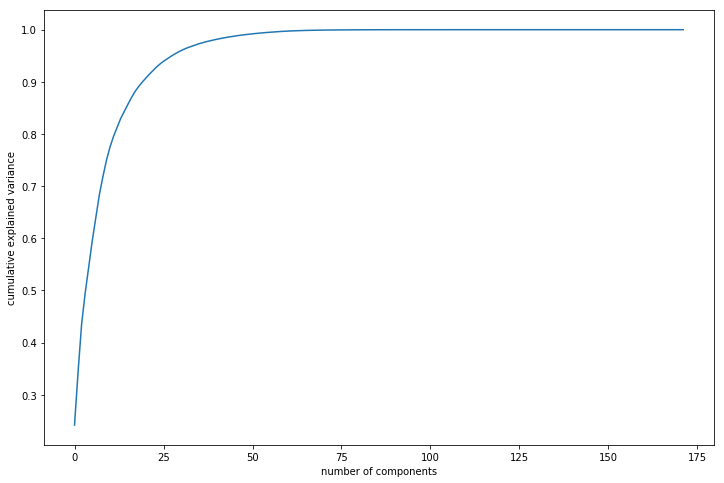

In [65]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### From the above plot, we can decipher that we can choose upto 30 components to explain more than 95 percent of the variance

In [66]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [67]:
train_pca = pca_final.fit_transform(X_train)
train_pca.shape

(3406, 30)

### Checking if correlations within principal components are zero

In [68]:
diag = np.corrcoef(train_pca.transpose()) - np.diagflat(np.corrcoef(train_pca.transpose()).diagonal())
print("max corr:",diag.max(), ", min corr: ", diag.min(),)


max corr: 0.005387576720330807 , min corr:  -0.005524520264060356


Correlation does seem to be very close to 0

In [69]:
test_pca = pca_final.transform(X_test)
test_pca.shape

(1460, 30)

## Evaluating different Classifiers 

### 1. Logistic Regression - Using Top Predictors which were revealed in EDA

In [70]:
# Training Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log = LogisticRegression()
model_1 = log.fit(train_pca,y_train)

In [71]:
# Predict on Test
pred_test = model_1.predict_proba(test_pca)

In [72]:
y_pred_df = pd.DataFrame(pred_test)
y_pred = y_pred_df.iloc[:,[1]]

In [73]:
y_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [74]:
y_pred_final = pd.concat([y_test,y_pred],axis=1)

In [75]:
y_pred_final= y_pred_final.rename(columns={ 1 : 'prob'})

In [76]:
y_pred_final

,churn,prob
0,0,0.38
1,0,0.04
2,1,0.39
3,1,0.75
4,0,0.03
5,1,0.75
6,0,0.63
7,1,0.91
8,0,0.02
9,1,0.98


### Calculate AUC and optimal threshold using ROC curve

In [76]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.prob)
auc = auc(fpr, tpr)
print(auc)

0.884797997237569


In [77]:
# Check Optimal cut-off
def Cutoff(tar, pred):

    fpr, tpr, thresh = roc_curve(tar, pred)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(thresh, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [78]:
# Calculate optimal threshold
threshold = Cutoff(y_pred_final.churn,y_pred_final.prob)
threshold

[0.4545048094900663]

In [79]:
# Create New column and update with 1 if Churn_Prob > 0.52 else 0
y_pred_final['predicted_churn'] = y_pred_final.prob.map( lambda x: 1 if x > 0.52 else 0)

In [80]:
y_pred_final.churn.value_counts()

0    736
1    724
Name: churn, dtype: int64

In [81]:
# Check Confusion Matrix
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted_churn )
print(confusion)

[[632 104]
 [158 566]]


In [82]:
true_negative= confusion[0,0] # true_negative
true_positive = confusion[1,1] # true_positive
false_positive = confusion[0,1] # false_positive
false_negative = confusion[1,0] # false_negative

In [83]:
#Precision
true_positive / float(true_positive+false_positive)

0.844776119402985

In [84]:
#Recall
true_positive / float(true_positive+false_negative )

0.7817679558011049

In [85]:
#False Postive Rate 
print(false_positive/ float(true_negative+false_positive))

0.14130434782608695


In [86]:
# Misclassification rate

(false_negative+false_positive)/(true_positive+true_negative+false_positive+false_negative)

0.17945205479452056

As we are looking for more sensitivity (TPR) we can check optimal cutoff using ROC Curve

### Observing ROC Curve

In [87]:
def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

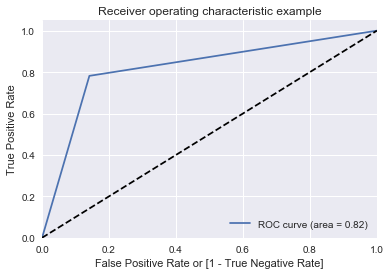

(array([0.        , 0.14130435, 1.        ]),
 array([0.        , 0.78176796, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [88]:
roc(y_pred_final.churn, y_pred_final.predicted_churn)

In [89]:
import pandas as pd
df=pd.DataFrame({'Threshold': thresholds, 
              'TPR': tpr, 
              'FPR':fpr,
              
             })
df=df[['Threshold','FPR','TPR']]


In [90]:
print(df)

     Threshold  FPR  TPR
0         1.99 0.00 0.00
1         0.99 0.00 0.00
2         0.97 0.00 0.01
3         0.97 0.00 0.01
4         0.97 0.00 0.01
5         0.97 0.00 0.01
6         0.96 0.00 0.02
7         0.96 0.00 0.02
8         0.95 0.00 0.05
9         0.95 0.01 0.05
10        0.94 0.01 0.09
11        0.94 0.01 0.09
12        0.91 0.01 0.20
13        0.91 0.01 0.20
14        0.91 0.01 0.20
15        0.91 0.01 0.20
16        0.89 0.01 0.28
17        0.89 0.01 0.28
18        0.89 0.01 0.30
19        0.89 0.01 0.30
20        0.89 0.01 0.30
21        0.89 0.01 0.30
22        0.88 0.01 0.33
23        0.88 0.01 0.33
24        0.87 0.01 0.34
25        0.87 0.02 0.34
26        0.87 0.02 0.35
27        0.87 0.02 0.35
28        0.86 0.02 0.38
29        0.86 0.02 0.38
30        0.86 0.02 0.38
31        0.86 0.02 0.38
32        0.86 0.02 0.40
33        0.85 0.02 0.40
34        0.85 0.02 0.41
35        0.85 0.03 0.41
36        0.85 0.03 0.42
37        0.85 0.03 0.42
38        0.84 0.03 0.43


#### From the above dataframe we observe that reducing the cutoff value, Sensitivity can be increased at the cost of increased FPR
#### Let us choose a cutoff of 0.32 and recalculate the recall and precision

In [91]:
y_pred_final['predicted_churn'] = y_pred_final.prob.map( lambda x: 1 if x > 0.32 else 0)

In [92]:
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted_churn )
confusion

array([[498, 238],
       [ 88, 636]], dtype=int64)

In [93]:
true_negative= confusion[0,0] # true_negative
true_positive = confusion[1,1] # true_positive
false_positive = confusion[0,1] # false_positive
false_negative = confusion[1,0] # false_negative

In [94]:
#Precision
true_positive / float(true_positive+false_positive)



0.7276887871853547

In [95]:
#Recall

true_positive / float(true_positive+false_negative )

0.8784530386740331

### 2. Decision Tree Classifier using Grid Search on PCA Data

In [96]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(train_pca,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

In [97]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.09,0.00,0.76,0.80,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",7,0.77,0.80,0.77,0.79,0.75,0.80,0.76,0.80,0.77,0.80,0.01,0.00,0.01,0.00
1,0.08,0.00,0.76,0.80,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",7,0.77,0.80,0.77,0.79,0.75,0.80,0.76,0.80,0.77,0.80,0.01,0.00,0.01,0.00
2,0.10,0.00,0.76,0.78,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,0.75,0.78,0.77,0.78,0.76,0.78,0.75,0.78,0.75,0.79,0.03,0.00,0.01,0.00
3,0.08,0.00,0.76,0.78,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,0.75,0.78,0.77,0.78,0.76,0.78,0.75,0.78,0.75,0.79,0.00,0.00,0.01,0.00
4,0.10,0.00,0.77,0.81,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,0.77,0.81,0.77,0.79,0.75,0.81,0.77,0.81,0.76,0.81,0.01,0.01,0.01,0.01


In [98]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7662947739283618
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [99]:
clf = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [100]:
y_pred = clf.predict(test_pca)
confusion=metrics.confusion_matrix(y_test,y_pred)
confusion

array([[617, 119],
       [200, 524]], dtype=int64)

In [101]:
true_negative= confusion[0,0] # true_negative
true_positive = confusion[1,1] # true_positive
false_positive = confusion[0,1] # false_positive
false_negative = confusion[1,0] # false_negative


In [102]:
#Precision
true_positive / float(true_positive+false_positive)

0.8149300155520995

In [103]:
#Recall
true_positive / float(true_positive+false_negative )

0.7237569060773481

### 3. XG Boost Classifier using Grid Search on PCA Data

In [104]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc

In [105]:
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'max_depth': [4,8,10]}          


# specify model
xgb_model = XGBClassifier(max_depth=5, n_estimators=200)

# set up GridSearchCV()
model = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  

In [106]:
model.fit(train_pca,y_train) 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9], 'max_depth': [4, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [107]:
cv = pd.DataFrame(model.cv_results_)


In [108]:
print('We can get accuracy of',model.best_score_,'using',model.best_params_)

We can get accuracy of 0.8833103383062361 using {'learning_rate': 0.2, 'max_depth': 8, 'subsample': 0.9}


In [109]:
params = {'learning_rate': 0.2,
          'max_depth': 8, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
# fit the model
model.fit(train_pca,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.9, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [110]:
y_pred = model.predict(test_pca)

confusion=metrics.confusion_matrix(y_test,y_pred)
confusion

array([[619, 117],
       [153, 571]], dtype=int64)

In [111]:
#Precision
true_positive / float(true_positive+false_positive)


0.8149300155520995

In [112]:
#Recall

true_positive / float(true_positive+false_negative )

0.7237569060773481

### 4. Random Forest using Grid Search on original Data

In [113]:
#Random Forest Grid Search

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, n_jobs = 1,verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train1, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  2.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

In [114]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8335290663534939 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [115]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=300)

In [116]:
rfc.fit(X_train1,y_train)

y_pred= rfc.predict(X_test1)

In [117]:
y_pred = rfc.predict(X_test1)

confusion=metrics.confusion_matrix(y_test,y_pred)
confusion

array([[663,  73],
       [167, 557]], dtype=int64)

In [118]:
true_negative= confusion[0,0] # true_negative
true_positive = confusion[1,1] # true_positive
false_positive = confusion[0,1] # false_positive
false_negative = confusion[1,0] # false_negative

In [119]:
#Precision
true_positive / float(true_positive+false_positive)



0.8841269841269841

In [120]:
#Recall

true_positive / float(true_positive+false_negative )

0.7693370165745856

## Feature Selection using Random Forest

In [121]:
from collections import OrderedDict
feature_names=list(X_train.columns.values)
important_features_dict = {}
for name, importance in zip(feature_names, rfc.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
d_descending = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [122]:
dic= dict(d_descending)

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=30
n_items = take(n, dic.items())

### Top 30 Features from Random Forest

In [123]:
n_items

[('loc_ic_mou_8', 0.0517368252956424),
 ('loc_ic_t2m_mou_8', 0.04712865558178524),
 ('total_ic_mou_8', 0.04635349539913166),
 ('total_rech_amt_8', 0.04451114190546451),
 ('last_day_rch_amt_8', 0.03700045278394286),
 ('loc_og_t2t_mou_8', 0.03674415844803995),
 ('loc_og_mou_8', 0.03654847756867326),
 ('loc_ic_t2t_mou_8', 0.03631058680799962),
 ('total_og_mou_8', 0.034535094836958845),
 ('arpu_8', 0.03220110801833477),
 ('loc_og_t2m_mou_8', 0.03164010139849757),
 ('total_og_mou_7_8', 0.025809900069894167),
 ('std_ic_mou_8', 0.02242087788060711),
 ('loc_ic_t2f_mou_8', 0.021177937891189567),
 ('max_rech_amt_8', 0.019958373102520445),
 ('duration_date_of_last_rech_data_8', 0.018731603316434406),
 ('duration_date_of_last_rech_8', 0.017597331806918456),
 ('av_rech_amt_data_8', 0.01723574221957227),
 ('duration_recharge_and_data', 0.015445904987113023),
 ('loc_og_t2f_mou_8', 0.015091459866569368),
 ('total_ic_mou_7_8', 0.014869471254681868),
 ('std_og_mou_8', 0.01482853125627966),
 ('onnet_mou_

## Business Insights 

- On the basis of 'Feature Importance Variables' which we got through Random Forest and EDA, we can infer that the Telecom Company needs to pay more attention to the Local and STD Packages at lower price ranges.
- With respect to Internet and Talktime recharges, duration from last recharge seems to be a key indicator for churn. As delays are observed in recharge patterns, the Telecom Company may consider to do Target Specific Campaigns to retain such customers.
- Significant dip in outgoing and incoming calls from Jul to Aug is also a key indicator for Churn. The Telecom company needs to understand the recharge patterns for these customers.
- Also majority important variables are for the action month of Aug. Here one suggestion is to conduct some type of survey or collect Voice of Customer to understand further sentiments.